In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
import pandas as pd
import torch
from torch import nn,optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 26.4M/26.4M [00:19<00:00, 1.33MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 246kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.87MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 3.26MB/s]


In [6]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [7]:
train_loader=DataLoader(training_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64,shuffle=True)

In [8]:
for images,labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


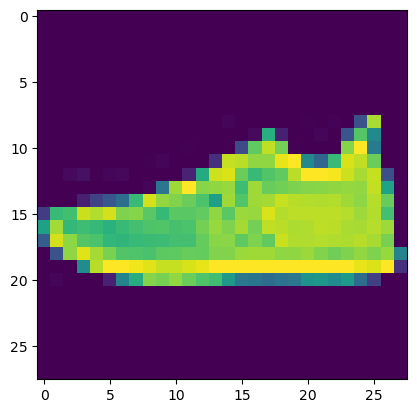

In [9]:
plt.imshow(images[0].reshape(28,28))

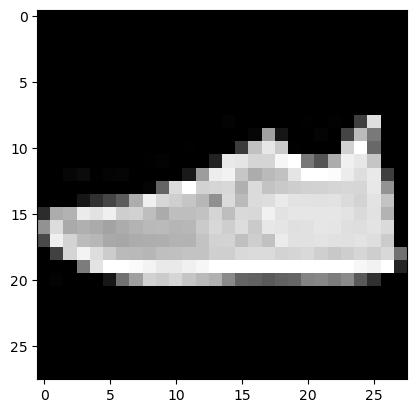

In [10]:
plt.imshow(images[0].squeeze(),cmap="gray")

In [12]:
labels[0]

tensor(7)

In [14]:
classes=[## from the documentation
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
classes[labels[0].item()]

'Sneaker'

In [ ]:
##Utilize the gpu if you have it else use the cpu,mps is for mac
device=("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
device 

'cpu'

In [19]:
class ClothsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),##28*28 into flatlist
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,x):
        x=self.network(x)
        return x

### Defining Model,optimizer and criterion

In [20]:
model=ClothsClassifier().to(device)
optimizer=optim.SGD(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()

### Training

In [22]:
epochs=2

for epoch in range(epochs):
    for batch,(images,labels) in enumerate(train_loader):
        images.to(device)##send to gpu if available
        labels.to(device)

        #1 forward pass
        pred=model(images)##We get back 64*10
        loss=loss_fn(pred,labels) 

        #2 back propogation
        loss.backward()

        #3 weight update
        optimizer.step()
        optimizer.zero_grad()

        if batch%100==0:
            print(f"Batch {batch},Loss:{loss.item()}")



Batch 0,Loss:2.2990212440490723
Batch 100,Loss:2.2952263355255127
Batch 200,Loss:2.277653694152832
Batch 300,Loss:2.2748100757598877
Batch 400,Loss:2.2501184940338135
Batch 500,Loss:2.249021530151367
Batch 600,Loss:2.2336244583129883
Batch 700,Loss:2.248375415802002
Batch 800,Loss:2.2126970291137695
Batch 900,Loss:2.201482057571411
Batch 0,Loss:2.187234878540039
Batch 100,Loss:2.194537878036499
Batch 200,Loss:2.1633827686309814
Batch 300,Loss:2.1291921138763428
Batch 400,Loss:2.1371512413024902
Batch 500,Loss:2.08099102973938
Batch 600,Loss:2.0761427879333496
Batch 700,Loss:2.0826761722564697
Batch 800,Loss:2.0313150882720947
Batch 900,Loss:2.012986421585083


### This was slow 

In [23]:
model=ClothsClassifier().to(device)
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)##SGD with momentum
loss_fn=nn.CrossEntropyLoss()

In [24]:
epochs=2

for epoch in range(epochs):
    for batch,(images,labels) in enumerate(train_loader):
        images.to(device)##send to gpu if available
        labels.to(device)

        #1 forward pass
        pred=model(images)##We get back 64*10
        loss=loss_fn(pred,labels) 

        #2 back propogation
        loss.backward()

        #3 weight update
        optimizer.step()
        optimizer.zero_grad()

        if batch%100==0:
            print(f"Batch {batch},Loss:{loss.item()}")



Batch 0,Loss:2.312929153442383
Batch 100,Loss:2.250140428543091
Batch 200,Loss:2.1196305751800537
Batch 300,Loss:1.8584551811218262
Batch 400,Loss:1.5689418315887451
Batch 500,Loss:1.3674513101577759
Batch 600,Loss:0.9848230481147766
Batch 700,Loss:1.1225627660751343
Batch 800,Loss:1.0535712242126465
Batch 900,Loss:0.8153163194656372
Batch 0,Loss:0.7303213477134705
Batch 100,Loss:0.7560504078865051
Batch 200,Loss:0.7420600056648254
Batch 300,Loss:0.653106689453125
Batch 400,Loss:0.5595719814300537
Batch 500,Loss:0.7011350393295288
Batch 600,Loss:0.8007292747497559
Batch 700,Loss:0.8347662687301636
Batch 800,Loss:0.6976210474967957
Batch 900,Loss:0.41142380237579346


### Let us try Adam 

In [25]:
model=ClothsClassifier().to(device)
optimizer=optim.Adam(model.parameters(),lr=0.001)##Adam peta1=.9,peta2=.999
loss_fn=nn.CrossEntropyLoss()

In [26]:
epochs=2

for epoch in range(epochs):
    for batch,(images,labels) in enumerate(train_loader):
        images.to(device)##send to gpu if available
        labels.to(device)

        #1 forward pass
        pred=model(images)##We get back 64*10
        loss=loss_fn(pred,labels) 

        #2 back propogation
        loss.backward()

        #3 weight update
        optimizer.step()
        optimizer.zero_grad()

        if batch%100==0:
            print(f"Batch {batch},Loss:{loss.item()}")



Batch 0,Loss:2.3197500705718994
Batch 100,Loss:0.8241854906082153
Batch 200,Loss:0.5739167928695679
Batch 300,Loss:0.4891570210456848
Batch 400,Loss:0.45718222856521606
Batch 500,Loss:0.3614749610424042
Batch 600,Loss:0.4132794439792633
Batch 700,Loss:0.5195913314819336
Batch 800,Loss:0.3736743628978729
Batch 900,Loss:0.3609936833381653
Batch 0,Loss:0.6733487844467163
Batch 100,Loss:0.40552014112472534
Batch 200,Loss:0.3465815484523773
Batch 300,Loss:0.4947812855243683
Batch 400,Loss:0.2879859507083893
Batch 500,Loss:0.34719666838645935
Batch 600,Loss:0.44586026668548584
Batch 700,Loss:0.3997705578804016
Batch 800,Loss:0.4901425540447235
Batch 900,Loss:0.2745017111301422
